In [47]:
import pandas as pd
import numpy as np
import sklearn
import os
from functools import reduce
import matplotlib.pyplot as plt
from datetime import datetime

In [146]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Model

Модель обучается на предобработанных данных (предобработка осуществляется в файле preprocessing.py)

In [100]:
data = pd.read_excel('result.xlsx')

In [67]:
data.head()

,Unnamed: 0,ФИО,Пол,Роль в мероприятии,Список компетенций,Должность,Категория,Начало трудового стажа,Место работы,Профессия,...,Строительный контроль,Технологии композитов,Технологические системы энергетических объектов,Токарные работы на станках с ЧПУ,Управление жизненным циклом,Управление качеством,Фрезерные работы на станках с ЧПУ,Цифровое ПСР-Предприятие (Lean Smart Plant),Электромонтаж,Электроника
0,0,ФИО_0,0,Участник мероприятия,Цифровое ПСР-Предприятие (Lean Smart Plant);,Инженер по подготовке производства,Инженер,1993-06-01,АО Чепецкий механический завод,Промышленная автоматика,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.9,NaN,NaN
1,1,ФИО_1,1,Участник мероприятия,Управление качеством;,Главный специалист,NaN,2000-08-01,Акционерное общество Научно-исследовательский...,NaN,...,NaN,NaN,NaN,NaN,NaN,19.18,NaN,NaN,NaN,NaN
2,2,ФИО_2,0,Участник мероприятия,Сварочные технологии;,Электрогазосварщик,NaN,NaT,"""Филиал Акционерного общества """"Русатом Инфрас...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,ФИО_3,0,Участник мероприятия,Инженер-конструктор;,инженер-конструктор,NaN,2005-07-01,"""Акционерное Общество """"Машиностроительный зав...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,ФИО_4,0,Участник мероприятия,Геодезия;,Мастер-лаборант,NaN,NaT,ОБПОУ Курский монтажный техникум,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
del data['Unnamed: 0']

In [102]:
data.head()

,ФИО,Пол,Роль в мероприятии,Список компетенций,Должность,Категория,Начало трудового стажа,Место работы,Профессия,Дата рождения,...,Строительный контроль,Технологии композитов,Технологические системы энергетических объектов,Токарные работы на станках с ЧПУ,Управление жизненным циклом,Управление качеством,Фрезерные работы на станках с ЧПУ,Цифровое ПСР-Предприятие (Lean Smart Plant),Электромонтаж,Электроника
0,ФИО_0,0,Участник мероприятия,Цифровое ПСР-Предприятие (Lean Smart Plant);,Инженер по подготовке производства,Инженер,1993-06-01,АО Чепецкий механический завод,Промышленная автоматика,1975-04-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.9,NaN,NaN
1,ФИО_1,1,Участник мероприятия,Управление качеством;,Главный специалист,NaN,2000-08-01,Акционерное общество Научно-исследовательский...,NaN,1977-07-19,...,NaN,NaN,NaN,NaN,NaN,19.18,NaN,NaN,NaN,NaN
2,ФИО_2,0,Участник мероприятия,Сварочные технологии;,Электрогазосварщик,NaN,NaT,"""Филиал Акционерного общества """"Русатом Инфрас...",NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ФИО_3,0,Участник мероприятия,Инженер-конструктор;,инженер-конструктор,NaN,2005-07-01,"""Акционерное Общество """"Машиностроительный зав...",NaN,1986-06-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ФИО_4,0,Участник мероприятия,Геодезия;,Мастер-лаборант,NaN,NaT,ОБПОУ Курский монтажный техникум,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
# часть данных не используется для предсказания

data.drop(['ФИО', 'Роль в мероприятии'], axis=1, inplace=True)

Следующий блок кода относится к обработке данных перед обучением модели. Текстовые поля закодированы методом dummy encoding. Пропущенные значения заполняются записью "нет данных". Таким образом все атрибуты учитываются в процессе обучения.
Атрибуты "Начало трудового стажа", "Дата рождения" и "Начало трудовой деятельности в РОСАТОМ" заменены на "Трудовой стаж", "Возраст" и "Стаж работы в РОСАТОМ". Пропущенные значения в этих столбцах заменены на медианные по каждому столбцу. <br>
Остальные пропуски заменены нулями.

In [71]:
text_columns = ['Список компетенций', 'Должность', 'Категория', 'Место работы', 'Профессия', 'Образование',
                'Место образования', 'Специальность']

In [104]:
data['Трудовой стаж'] = np.nan

In [58]:
current_date = datetime.today()
current_year = current_date.year
current_year # для вычисления текущего возраста и стажа

2023

In [105]:
data['Год начала трудового стажа'] = pd.DatetimeIndex(data['Начало трудового стажа']).year

In [106]:
data['Трудовой стаж'] = current_year - data['Год начала трудового стажа']

In [85]:
data.head()

,Пол,Список компетенций,Должность,Категория,Начало трудового стажа,Место работы,Профессия,Дата рождения,Начало трудовой деятельности в РОСАТОМ,Образование,...,Технологические системы энергетических объектов,Токарные работы на станках с ЧПУ,Управление жизненным циклом,Управление качеством,Фрезерные работы на станках с ЧПУ,Цифровое ПСР-Предприятие (Lean Smart Plant),Электромонтаж,Электроника,Трудовой стаж,Год начала трудового стажа
0,0,Цифровое ПСР-Предприятие (Lean Smart Plant);,Инженер по подготовке производства,Инженер,1993-06-01,АО Чепецкий механический завод,Промышленная автоматика,1975-04-14,2001-01-25,NaN,...,NaN,NaN,NaN,NaN,NaN,63.9,NaN,NaN,30.0,1993.0
1,1,Управление качеством;,Главный специалист,NaN,2000-08-01,Акционерное общество Научно-исследовательский...,NaN,1977-07-19,2021-09-14,NaN,...,NaN,NaN,NaN,19.18,NaN,NaN,NaN,NaN,23.0,2000.0
2,0,Сварочные технологии;,Электрогазосварщик,NaN,NaT,"""Филиал Акционерного общества """"Русатом Инфрас...",NaN,NaT,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,Инженер-конструктор;,инженер-конструктор,NaN,2005-07-01,"""Акционерное Общество """"Машиностроительный зав...",NaN,1986-06-23,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,2005.0
4,0,Геодезия;,Мастер-лаборант,NaN,NaT,ОБПОУ Курский монтажный техникум,NaN,NaT,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
data['Возраст'] = current_year - pd.DatetimeIndex(data['Дата рождения']).year

In [108]:
data['Стаж работы в РОСАТОМ'] = current_year - pd.DatetimeIndex(data['Начало трудовой деятельности в РОСАТОМ']).year

In [109]:
data.describe()

,Пол,Аддитивные технологии,Анатилический контроль,Бетонные строительные работы,Водитель спецавтомобиля,Вывод из эксплуатации объектов использования атомной энергии,Геодезия,Изготовление прототипов,Инженер-конструктор,Инженер-технолог машиностроения,...,Управление жизненным циклом,Управление качеством,Фрезерные работы на станках с ЧПУ,Цифровое ПСР-Предприятие (Lean Smart Plant),Электромонтаж,Электроника,Трудовой стаж,Год начала трудового стажа,Возраст,Стаж работы в РОСАТОМ
count,713.000000,7.000000,20.000000,15.000000,15.000000,32.000000,12.000000,9.000000,20.000000,9.000000,...,63.000000,28.000000,7.000000,24.000000,16.000000,19.000000,547.000000,547.000000,498.000000,371.000000
mean,0.218794,52.620000,44.152000,69.104000,51.631333,67.777500,62.883333,29.062222,31.878000,51.706667,...,53.966667,42.038571,41.534286,58.466250,41.606875,37.719474,11.579525,2011.420475,32.467871,7.973046
std,0.413719,12.489318,14.380059,11.107049,9.522696,14.392242,21.428394,9.702906,12.593492,23.578159,...,9.327222,14.101562,17.664802,9.232713,20.151441,14.505930,7.889494,7.889494,8.138883,6.764720
min,0.000000,35.220000,21.470000,51.800000,34.830000,40.310000,37.000000,17.230000,8.920000,16.350000,...,41.880000,9.800000,16.590000,40.340000,17.400000,7.510000,1.000000,1979.000000,1.000000,-1.000000
25%,0.000000,45.090000,34.810000,63.230000,44.160000,62.072500,45.050000,21.230000,24.707500,40.550000,...,44.540000,33.620000,30.230000,55.222500,26.952500,27.505000,5.000000,2007.000000,26.000000,3.000000
50%,0.000000,55.140000,42.330000,70.780000,50.760000,66.885000,60.025000,26.180000,35.765000,55.110000,...,56.030000,44.840000,43.110000,59.590000,39.425000,37.900000,10.000000,2013.000000,32.000000,6.000000
75%,0.000000,60.420000,49.692500,77.880000,58.220000,80.045000,85.350000,32.220000,39.357500,71.020000,...,59.390000,51.270000,53.380000,62.932500,47.100000,48.115000,16.000000,2018.000000,38.000000,11.000000
max,1.000000,66.960000,78.150000,81.830000,67.930000,86.610000,89.850000,43.960000,51.380000,80.950000,...,68.390000,64.110000,63.820000,73.530000,84.860000,65.580000,44.000000,2022.000000,62.000000,37.000000


In [111]:
# исключение столбцов, которые не будут использованы далее

data.drop(['Начало трудового стажа', 'Дата рождения', 'Начало трудовой деятельности в РОСАТОМ', 'Год начала трудового стажа',
          'Год оканчания'],
          axis=1, inplace=True)

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 50 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Пол                                                                   713 non-null    int64  
 1   Список компетенций                                                    713 non-null    object 
 2   Должность                                                             635 non-null    object 
 3   Категория                                                             210 non-null    object 
 4   Место работы                                                          707 non-null    object 
 5   Профессия                                                             178 non-null    object 
 6   Образование                                                           143 non-null    object 
 7  

In [113]:
# заполнение пропущенных значений

data.fillna({'Должность':'нет данных', 'Категория':'нет данных', 'Место работы': 'нет данных', 
             'Профессия': 'нет данных', 'Образование': 'нет данных', 'Место образования': 'нет данных', 
             'Специальность': 'нет данных'}, 
            inplace=True)

In [115]:
data.fillna({'Трудовой стаж': data['Трудовой стаж'].median(), 
            'Возраст': data['Возраст'].median(),
            'Стаж работы в РОСАТОМ': data['Стаж работы в РОСАТОМ'].median()}, 
           inplace=True)

In [118]:
data.fillna(0, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 49 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Пол                                                                   713 non-null    int64  
 1   Список компетенций                                                    713 non-null    object 
 2   Должность                                                             713 non-null    object 
 3   Категория                                                             713 non-null    object 
 4   Место работы                                                          713 non-null    object 
 5   Профессия                                                             713 non-null    object 
 6   Образование                                                           713 non-null    object 
 7  

In [119]:
# кодирование текстовых данных

encoded_data = pd.get_dummies(data=data, columns=text_columns)

In [120]:
encoded_data

,Пол,Аддитивные технологии,Анатилический контроль,Бетонные строительные работы,Водитель спецавтомобиля,Вывод из эксплуатации объектов использования атомной энергии,Геодезия,Изготовление прототипов,Инженер-конструктор,Инженер-технолог машиностроения,...,Специальность_металлургия цветных металлов,Специальность_нет,Специальность_нет данных,Специальность_управление в технических системах,Специальность_химическая технология;Химическая технология,Специальность_химическая технолоия и биотехнология,Специальность_химическая физика,Специальность_экономика и управление на предприятии;атомные электрические станции и установки,Специальность_экономист-менеджер,Специальность_электроника и наноэлектрорика
0,0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,...,0,0,1,0,0,0,0,0,0,0
1,1,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,...,0,0,1,0,0,0,0,0,0,0
2,0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,...,0,0,1,0,0,0,0,0,0,0
3,0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,38.48,0.0,...,0,0,1,0,0,0,0,0,0,0
4,0,0.0,0.00,0.00,0.0,0.0,48.0,0.00,0.00,0.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,0,0.0,0.00,63.23,0.0,0.0,0.0,0.00,0.00,0.0,...,0,0,1,0,0,0,0,0,0,0
709,1,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,...,0,0,1,0,0,0,0,0,0,0
710,1,0.0,50.09,0.00,0.0,0.0,0.0,0.00,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0
711,0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,...,0,0,1,0,0,0,0,0,0,0


Для предварительного понимания того, как распределены данные, далее строятся графики scatterplot

In [124]:
ys = encoded_data.iloc[:, 1:38].columns # распределение по технологическим направлениям чемпионата

In [144]:
X = encoded_data[[col for col in encoded_data.columns if col not in ys]]

In [147]:
# нормализация данных

X_norm = (X - X.min())/(X.max() - X.min())
pca = PCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X))

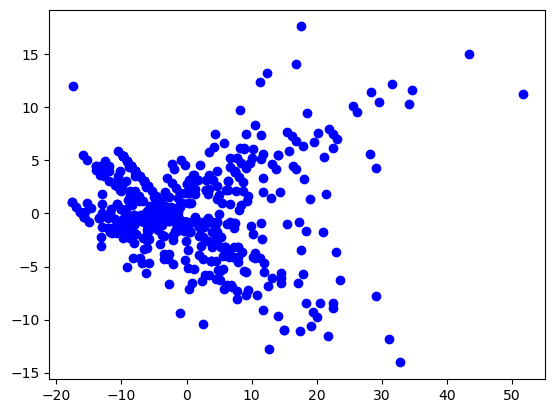

In [173]:
# распределение данных для каждого направления выглядит похожим образом, ниже представлен один из примеров

for i in range(len(ys)):
    curr_tech = transformed[encoded_data[ys[i]] > 0]
    curr_tech_plot = plt.scatter(curr_tech[:][0], curr_tech[:][1], label='clusters', c='blue')
    curr_tech_fig = curr_tech_plot.get_figure()
    curr_tech_fig.savefig(str(i) + '_tech.png')

In [208]:
# второй вариант -- распределение по компетенциям

ys = encoded_data.iloc[:, 41:41+39].columns
X = encoded_data[[col for col in encoded_data.columns if col not in ys]]

In [209]:
X_norm = (X - X.min())/(X.max() - X.min())
pca = PCA(n_components=2) # 2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))

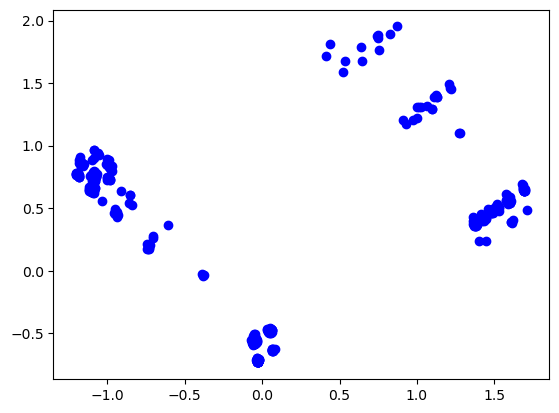

In [210]:
for i in range(len(ys)):
    curr_tech = transformed[encoded_data[ys[i]] > 0]
    curr_tech_plot = plt.scatter(curr_tech[:][0], curr_tech[:][1], label='clusters', c='blue')
    curr_tech_fig = curr_tech_plot.get_figure()
    curr_tech_fig.savefig(str(i) + '_comp.png')

In [211]:
# подготовка всего датасета к обучению

norm_data = (encoded_data - encoded_data.min())/(encoded_data.max() - encoded_data.min())

In [212]:
norm_data.head()

,Пол,Аддитивные технологии,Анатилический контроль,Бетонные строительные работы,Водитель спецавтомобиля,Вывод из эксплуатации объектов использования атомной энергии,Геодезия,Изготовление прототипов,Инженер-конструктор,Инженер-технолог машиностроения,...,Специальность_нет,Специальность_нет данных,Специальность_управление в технических системах,Специальность_химическая технология;Химическая технология,Специальность_химическая технолоия и биотехнология,Специальность_химическая физика,Специальность_экономика и управление на предприятии;атомные электрические станции и установки,Специальность_экономист-менеджер,Специальность_электроника и наноэлектрорика,clusters
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.74893,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.534224,0.0,0.00000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5


In [183]:
# определение оптимального числа кластеров

def find_best_clusters(df, maximum_K):
    
    clusters_centers = []
    k_values = []
    
    for k in range(1, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)
        
        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)
        
    
    return clusters_centers, k_values

In [184]:
def generate_elbow_plot(clusters_centers, k_values):
    
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

/Users/nataliapovarova/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/nataliapovarova/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/nataliapovarova/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/nataliapovarova/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppre

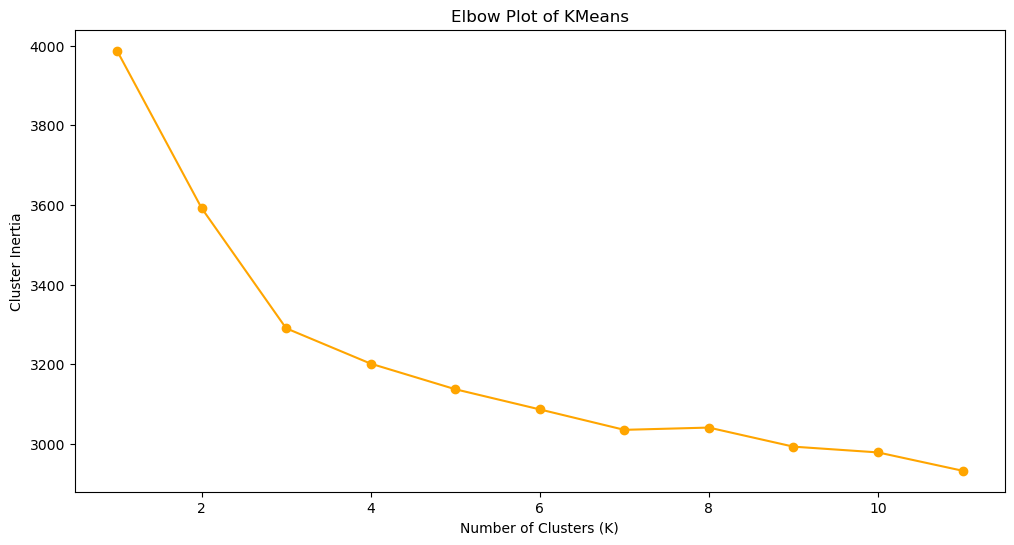

In [186]:
clusters_centers, k_values = find_best_clusters(norm_data, 12)
generate_elbow_plot(clusters_centers, k_values)

Оптимальным представляется выбрать 4-5 кластеров, однако в данном случае, в силу большого числа пропущенных значений, 4-5 кластеров сильно пересекаются между собой. В результате выбрано 3 кластера, которые хорошо разделяются (показано далее на графике scatterplot).

In [245]:
kmeans_model = KMeans(n_clusters = 3)
kmeans_model.fit(norm_data)

/Users/nataliapovarova/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [246]:
data["clusters"] = kmeans_model.labels_
data.head()

,Пол,Список компетенций,Должность,Категория,Место работы,Профессия,Образование,Место образования,Специальность,Аддитивные технологии,...,Управление жизненным циклом,Управление качеством,Фрезерные работы на станках с ЧПУ,Цифровое ПСР-Предприятие (Lean Smart Plant),Электромонтаж,Электроника,Трудовой стаж,Возраст,Стаж работы в РОСАТОМ,clusters
0,0,Цифровое ПСР-Предприятие (Lean Smart Plant);,Инженер по подготовке производства,Инженер,АО Чепецкий механический завод,Промышленная автоматика,нет данных,нет данных,нет данных,0.0,...,0.0,0.00,0.0,63.9,0.0,0.0,30.0,48.0,22.0,1
1,1,Управление качеством;,Главный специалист,нет данных,Акционерное общество Научно-исследовательский...,нет данных,нет данных,нет данных,нет данных,0.0,...,0.0,19.18,0.0,0.0,0.0,0.0,23.0,46.0,2.0,2
2,0,Сварочные технологии;,Электрогазосварщик,нет данных,"""Филиал Акционерного общества """"Русатом Инфрас...",нет данных,нет данных,нет данных,нет данных,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,10.0,32.0,6.0,2
3,0,Инженер-конструктор;,инженер-конструктор,нет данных,"""Акционерное Общество """"Машиностроительный зав...",нет данных,нет данных,нет данных,нет данных,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,18.0,37.0,6.0,2
4,0,Геодезия;,Мастер-лаборант,нет данных,ОБПОУ Курский монтажный техникум,нет данных,нет данных,нет данных,нет данных,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,10.0,32.0,6.0,2


In [247]:
encoded_data["clusters"] = kmeans_model.labels_
encoded_data.head()

,Пол,Аддитивные технологии,Анатилический контроль,Бетонные строительные работы,Водитель спецавтомобиля,Вывод из эксплуатации объектов использования атомной энергии,Геодезия,Изготовление прототипов,Инженер-конструктор,Инженер-технолог машиностроения,...,Специальность_нет,Специальность_нет данных,Специальность_управление в технических системах,Специальность_химическая технология;Химическая технология,Специальность_химическая технолоия и биотехнология,Специальность_химическая физика,Специальность_экономика и управление на предприятии;атомные электрические станции и установки,Специальность_экономист-менеджер,Специальность_электроника и наноэлектрорика,clusters
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0,1,0,0,0,0,0,0,0,1
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0,1,0,0,0,0,0,0,0,2
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0,1,0,0,0,0,0,0,0,2
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.48,0.0,...,0,1,0,0,0,0,0,0,0,2
4,0,0.0,0.0,0.0,0.0,0.0,48.0,0.0,0.00,0.0,...,0,1,0,0,0,0,0,0,0,2


In [248]:
# визуализация полученных кластеров

y = encoded_data['clusters']
X = encoded_data.loc[:, encoded_data.columns != 'clusters']

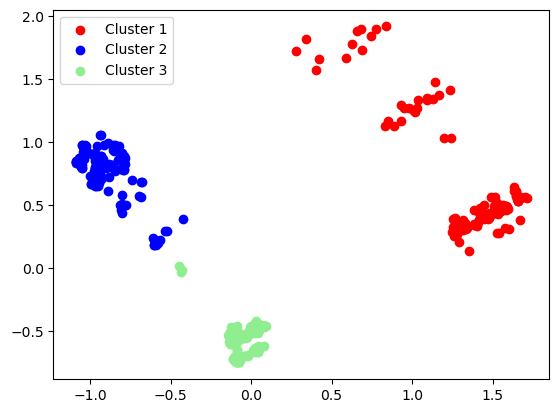

In [249]:
X_norm = (X - X.min())/(X.max() - X.min())
pca = PCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))
plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Cluster 1', c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Cluster 2', c='blue')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Cluster 3', c='lightgreen')

plt.legend()
plt.show()

Из приведенного графика видно, что кластеров больше, чем три, однако в результате тестов с разным числом кластеров было показано, что при большем числе они смешиваются. Для наиболее надежного результата принято решение остановиться на трех кластерах.